## Find ellipse from declared points using SVD

In [39]:
import cv2
import numpy as np
import os
from math import *
from skimage import io
from matplotlib import pyplot as plt

In [40]:
!wget https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/ellipses/e1.jpg

--2019-07-30 16:02:29--  https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/ellipses/e1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.52.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.52.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103263 (101K) [image/jpeg]
Saving to: <<e1.jpg.1>>

e1.jpg.1            100%[===================>] 100.84K   178KB/s    in 0.6s    

2019-07-30 16:02:31 (178 KB/s) - <<e1.jpg.1>> saved [103263/103263]



In [41]:
image_path = 'e1.jpg'

In [42]:
img = io.imread(image_path)

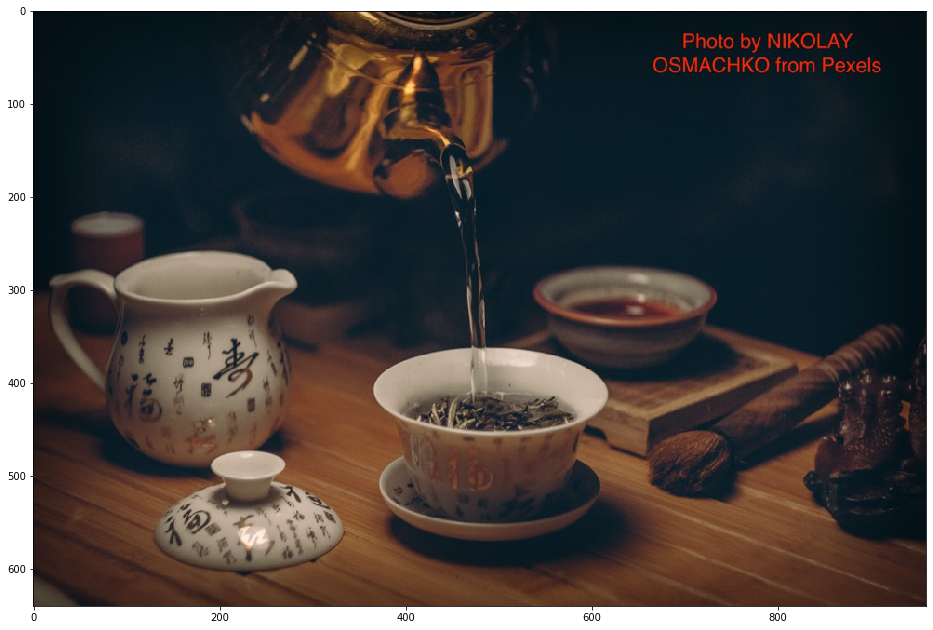

In [43]:
plt.figure(figsize=(16,14))
plt.imshow(img)

In [44]:
# Initial points
points = np.array([ [366, 407], [513, 363], [377, 426], 
                    [486, 456], [565, 449], [595, 385]], np.double)

In [45]:
def construct_m_and_r(points):
    m = np.zeros((6,6))
    r = np.zeros((6,1))
    # Fill matrix M and R with data
    for k in range(0, len(points)):
        m[k][0] = points[k][0]*points[k][0]
        m[k][1] = 2*points[k][0] * points[k][1]
        m[k][2] = points[k][1]*points[k][1]
        m[k][3] = 2*points[k][0]
        m[k][4] = 2*points[k][1]
        m[k][5] = 1
        r[k] = points[k][0]*points[k][0]
    return m, r

In [46]:
m, r = construct_m_and_r(points)
# Compute SVD and store eigenvectors
mu, ms, mv = np.linalg.svd(m)
R = mv[-1, :]

In [47]:
R /= R[0]
E = np.array([[R[0], R[1], R[3]], [R[1], R[2], R[4]],
[R[3], R[4], R[5]] ], np.double)

In [48]:
#circle->ellipse conversion
u, s, v = np.linalg.svd(E)
u2 = np.matmul(u, np.diag(np.sqrt(s)) )
H = np.linalg.inv( u2.T)

In [49]:
# Draw ellipse
for alpha in range(0,360):
    a1 = np.matmul( H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
    a1 = (a1/a1[2])
    a2 = np.matmul( H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
    a2 = (a2/a2[2])
    cv2.line(img, (a1[0],a1[1]),(a2[0],a2[1]),(0,0,255), 1)

for k in range(0, len(points)):
    cv2.circle(img, (int(points[k][0]),int(points[k][1])),3,(0,255,0))

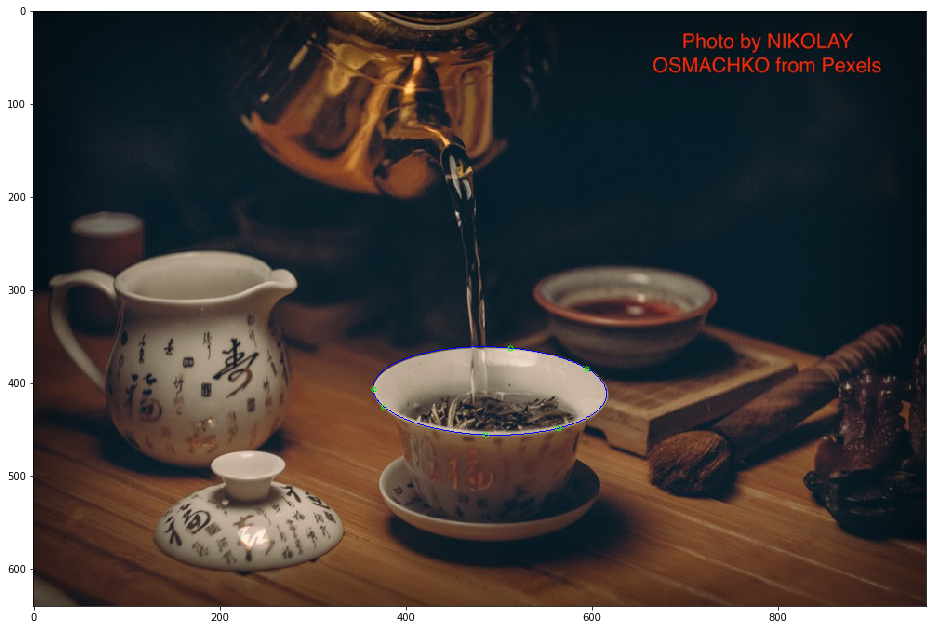

In [50]:
plt.figure(figsize=(16,14))
plt.imshow(img)